In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import collections

from utils import *

%matplotlib inline
# !pip install matplotlib
# !pip install pandas
# !pip install seaborn

### Descrição dos dados


**num_boletim**: Número do Boletim de Ocorrência, exemplo: 206099 ou 2016-000009920-001

**data_boletim**: Data do acidente registrada no Boletim de Ocorrência, exemplo: 24/4/1999

**hora_boletim**: Hora do acidente registrada no Boletim de Ocorrência, exemplo: 18:10:00

**N_envolvido**: Número do envolvido no acidente, exemplo: 1 - Paulo Sergio da Silva, 2 - Lorival Oliveira Franco.

**condutor**: Indica se o envolvido no acidente é condutor ou não. Valores possiveis: 'S'- sim, 'N' - Nao e 0 - Não informado.

**cod_severidade**: Codigo da severidade. Exemplo: 0 - não informado, 1 - não fatal, 2 - fatal, 3 - sem ferimentos.

**desc_severidade**: Descrição da severidade.

**sexo**: Sexo do envolvido. Valores possíveis: M-Masculino, F-Feminino e 0-Não informado.

**cinto_seguranca**: Indica se o envolvido no acidente estava usando o cinto de segurança.

**Embreagues**: Indica se o envolvido no acidente estava embriagado.

**Idade**: Idade do envolvido. Exemplo: 26.

**nascimento**: Data de nascimento do envolvido. Exemplo: 14/11/1974.

**categoria_habilitacao**: Codigo da categoria de habilitacao. Exemplo: IN - Inabilitado, N - Nao informado, B - veiculos motor, com ate 8 passageiros, peso 
maximo 3500 kg, C - veic. motor p/ transp. de carga, c/ peso max. aut. 3500 kg.
**descricao_habilitacao**: Calculado a partir do valor de "categoria_habilitacao".

**declaracao_obito**: Número da declaração de óbito.

**cod_severidade_antiga**: Código da severidade antiga. Exemplo: 0 - nao informado, 1 - nao fatal, 2 - fatal, 3 - sem ferimentos.

**especie_veiculo**: Descrição do código da especie do veículo. Exemplos: 1 - bicicleta, 2 - ciclomotor, 3 - motoneta, 4 - motocicleta, 5 - triciclo, 6 - 
automóvel.
**pedestre**:Indicativo de Pedestre (para os acidentes a partir de 2015). Exemplo: 0 - nao informado, S - Sim, N - Nao.

**passageiro**: Indicativo de Passageiro. Exemplo: 0 - nao informado, S - Sim, N - Nao.


In [2]:
# new_file = open('new_detran2.csv', "r+")
# with open('./teste.csv', encoding='utf-8') as file: 
#     for i in file:
# #         print(i.replace(",", ";"))
#         new_file.write(i.replace(";", ","))
    
# new_file.close()

df_2018 = pd.read_csv('new_detran_2018.csv')
df_2021 = pd.read_csv('new_detran_2021.csv')

mes_2018 = []
mes_2021 = []

for i in df_2018['data_boletim']:
    a = i.split('/')
    mes_2018.append(a[1])

for i in df_2021['data_boletim']:
    a = i.split('/')
    mes_2021.append(a[1])

mes_2018 = np.sort(mes_2018)
mes_2021 = np.sort(mes_2021)

acidentes_2018 = num_acidentes(mes_2018)
# print(acidentes_2018)

acidentes_2021 = num_acidentes(mes_2021)
# print(acidentes_2021)



## Histograma

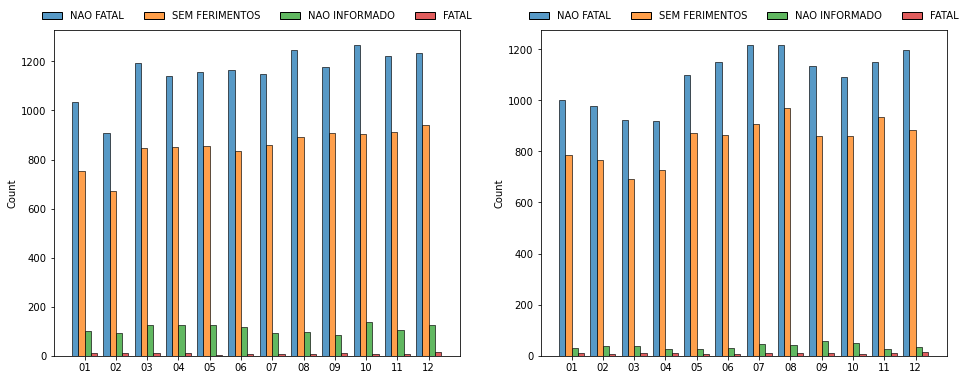

In [3]:
# plt.figure(figsize=(8,4))
# sns.scatterplot(data=df_2018, x=lista, y='desc_severidade', hue='data_boletim')
# plt.show()

order = ['NAO FATAL', 'SEM FERIMENTOS', 'NAO INFORMADO', 'FATAL']

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(16,6))
a = sns.histplot(data=df_2018, bins=12, x=mes_2018, hue='desc_severidade', hue_order=order, multiple='dodge', shrink=0.8, ax=axes[0])
b = sns.histplot(data=df_2021, bins=12, x=mes_2021, hue='desc_severidade', hue_order=order, multiple='dodge', shrink=0.8, ax=axes[1])
sns.move_legend(a, 'lower center', bbox_to_anchor=(.5, 1), ncol=4, title=None, frameon=False)
sns.move_legend(b, 'lower center', bbox_to_anchor=(.5, 1), ncol=4, title=None, frameon=False)

plt.show()

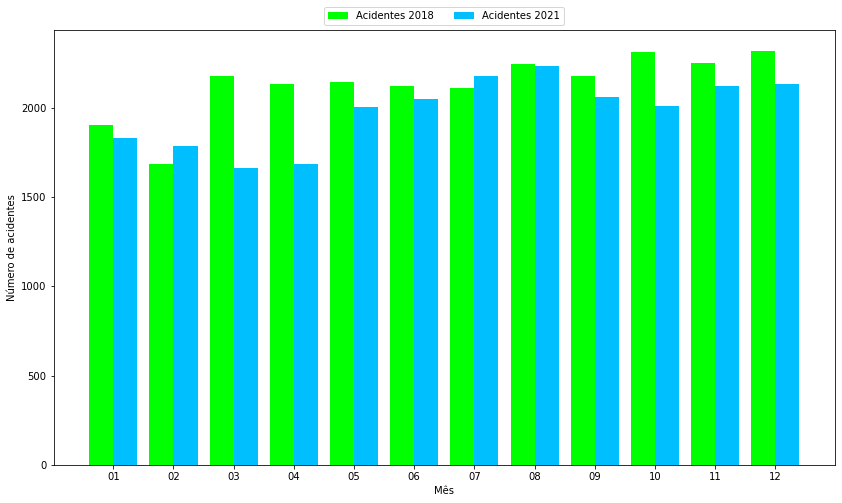

In [12]:
x = np.array(['01', '02', '03', '04', '05', '06', '07', '08', '09', '10', '11', '12'])

X_axis = np.arange(len(x))

y_2018 = acidentes_2018
y_2021 = acidentes_2021

plt.figure(figsize=(14,8))

plt.bar(X_axis - 0.2, y_2018, 0.4, label= 'Acidentes 2018', color=['lime'])
plt.bar(X_axis + 0.2, y_2021, 0.4, label= 'Acidentes 2021', color=['deepskyblue'])

plt.xticks(X_axis, x)
plt.xlabel("Mês")
plt.ylabel("Número de acidentes")
plt.legend(loc='lower center', bbox_to_anchor=(0.5, 1), ncol=2)

plt.show()

In [82]:
dia_mes_2018 = []

for i in df_2018['data_boletim']:
    a = i.split('/')
    dia_mes_2018.append(a[0] + '/' + a[1])

# dia_mes_2018 = np.array(dia_mes_2018)
# dia_mes_2018 = np.sort(dia_mes_2018)


acidentes2 = []
  
counter = collections.Counter(dia_mes_2018)
c = collections.OrderedDict(sorted(counter.items()))
for i in c.keys():
    acidentes2.append(counter[f'{i}'])

    
meses = dict()
for i in range(1,13):
    a = str(i)
    if len(a) == 1:
        a = '0' + a
    meses.update({f"{a}": dict()})
# print(meses)
    
# print(c.keys())
for i in c.keys():
    dm = i.split('/')
    meses[f"{dm[1]}"].update({f"{i}": c[i]})
#     meses.update({f"{dm[1]}": })
#     print(i + ":" + str(c[i]))

for i in meses.keys():
    print(i + ":" + str(meses[i]))


# for i in range(1,13):
#     a = str(i)
#     if len(a) == 1:
#         a = '0' + a
    
# print(acidentes2)
# for j in c:
#     print(j)

# x = np.linspace(0, 10, 30)
# y = np.sin(x)

# plt.plot(x, y, '-ok')
# plt.show()

01:{'01/01': 44, '02/01': 53, '03/01': 46, '04/01': 64, '05/01': 40, '06/01': 50, '07/01': 40, '08/01': 61, '09/01': 68, '10/01': 73, '11/01': 72, '12/01': 67, '13/01': 55, '14/01': 71, '15/01': 70, '16/01': 44, '17/01': 67, '18/01': 89, '19/01': 66, '20/01': 104, '21/01': 43, '22/01': 67, '23/01': 72, '24/01': 61, '25/01': 60, '26/01': 84, '27/01': 60, '28/01': 53, '29/01': 56, '30/01': 52, '31/01': 50}
02:{'01/02': 66, '02/02': 66, '03/02': 54, '04/02': 51, '05/02': 78, '06/02': 67, '07/02': 43, '08/02': 76, '09/02': 88, '10/02': 45, '11/02': 51, '12/02': 52, '13/02': 45, '14/02': 45, '15/02': 61, '16/02': 53, '17/02': 45, '18/02': 44, '19/02': 46, '20/02': 59, '21/02': 49, '22/02': 91, '23/02': 66, '24/02': 82, '25/02': 41, '26/02': 94, '27/02': 67, '28/02': 59}
03:{'01/03': 84, '02/03': 76, '03/03': 61, '04/03': 62, '05/03': 65, '06/03': 73, '07/03': 55, '08/03': 79, '09/03': 72, '10/03': 69, '11/03': 48, '12/03': 86, '13/03': 82, '14/03': 70, '15/03': 72, '16/03': 83, '17/03': 66,